## Import Libraries and Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

## 1. Load Datasets

Datasets Link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [6]:
# Load the dataset
credit_card_df = pd.read_csv("creditcard.csv", low_memory=False)

In [7]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Pre process the data

In [13]:
# Step 1: Check for missing values
print("Missing values in dataset:")
print(credit_card_df.isnull().sum())

# Step 2: Normalize the 'Amount' column
credit_card_df['Amount'] = (credit_card_df['Amount'] - credit_card_df['Amount'].mean()) / credit_card_df['Amount'].std()

# Step 3: Handle Class Imbalance using Oversampling
# Separate majority and minority classes
majority_class = credit_card_df[credit_card_df['Class'] == 0]
minority_class = credit_card_df[credit_card_df['Class'] == 1]

# Oversample the minority class
minority_oversampled = minority_class.sample(len(majority_class), replace=True, random_state=42)

# Combine the classes back into a balanced dataset
balanced_data = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 4: Split Data into Features (X) and Target (y)
X = balanced_data.drop(columns=['Class'], axis=1)
y = balanced_data['Class']

X.head()

Missing values in dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,41313.0,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,...,-1.025228,3.058082,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,-0.313288
1,165981.0,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,-1.076274,...,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,-0.353229
2,4272.0,1.012633,0.185475,1.857025,2.625659,-0.813666,0.741190,-1.050536,0.411454,1.078232,...,-0.240510,0.167710,0.665263,0.034245,0.149376,0.061459,0.073727,0.024627,0.023361,-0.304692
3,28658.0,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.706889,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,0.046539
4,93834.0,-3.765680,5.890735,-10.202268,10.259036,-5.611448,-3.235376,-10.632683,3.272716,-5.268905,...,1.194137,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,-0.353189


## 3. Exploratory Data Analysis (EDA)

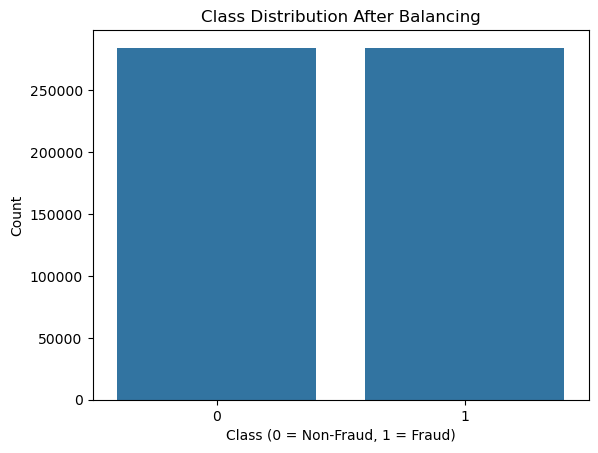

In [16]:
# Class distribution
sns.countplot(x=y)
plt.title("Class Distribution After Balancing")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

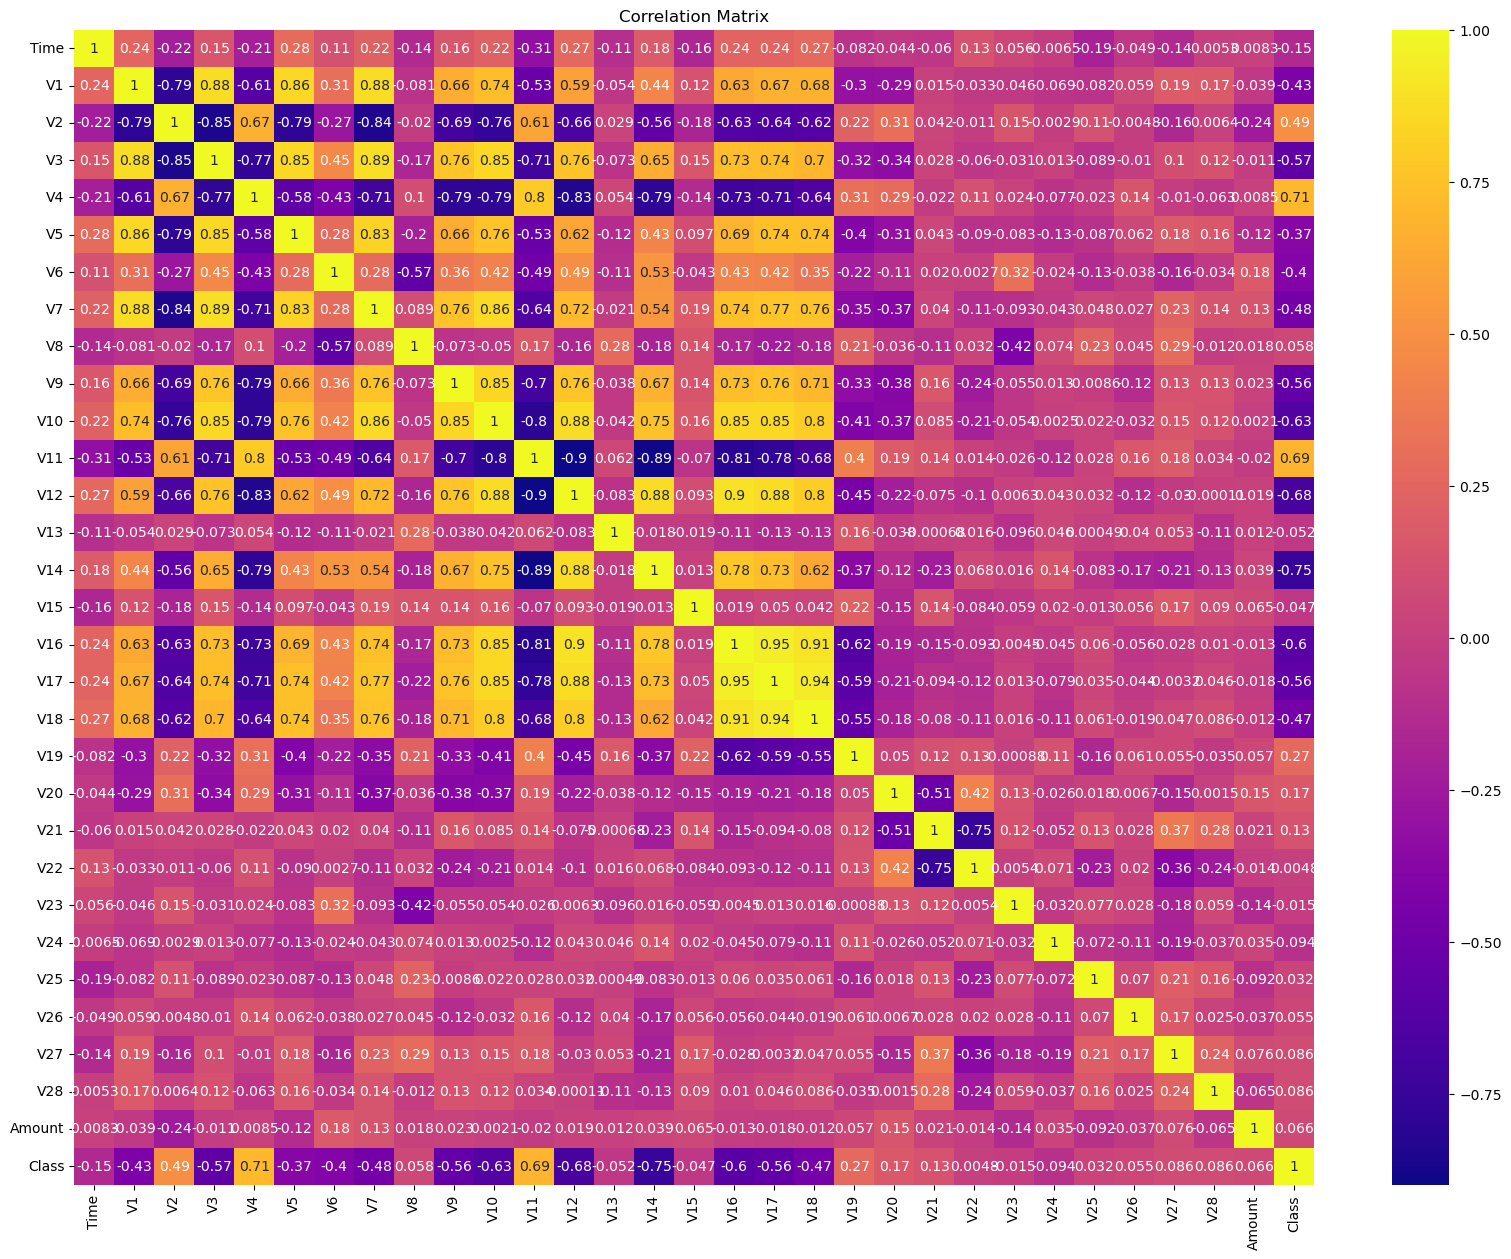

In [18]:
# Correlation heatmap
correlation_matrix = balanced_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma")
plt.title("Correlation Matrix")
plt.show()

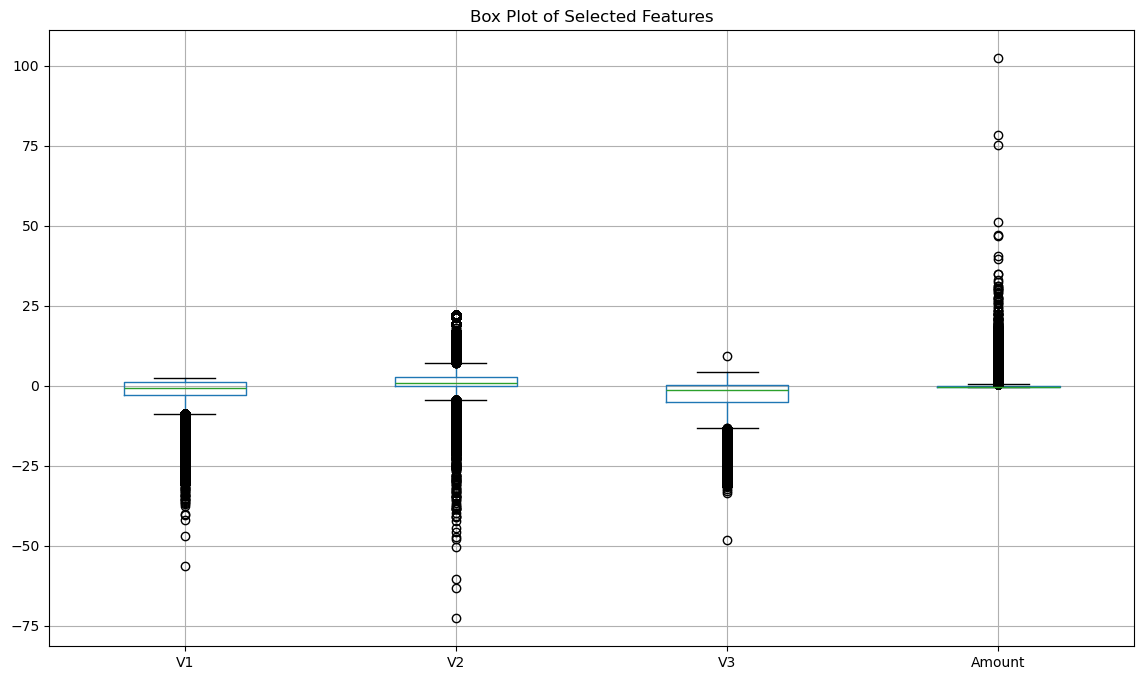

In [20]:
# Box plot of selected features
selected_features = ["V1", "V2", "V3", "Amount"]
plt.figure(figsize=(14, 8))
balanced_data[selected_features].boxplot()
plt.title("Box Plot of Selected Features")
plt.show()

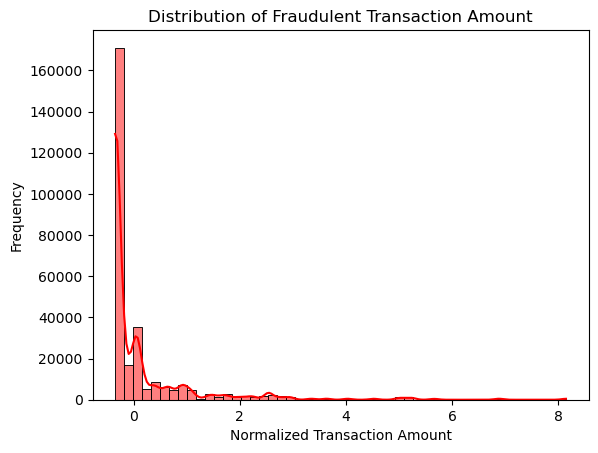

In [22]:
# Fraudulent transaction amount distribution
fraud_data = balanced_data[balanced_data['Class'] == 1]
sns.histplot(fraud_data['Amount'], bins=50, kde=True, color="red")
plt.title("Distribution of Fraudulent Transaction Amount")
plt.xlabel("Normalized Transaction Amount")
plt.ylabel("Frequency")
plt.show()

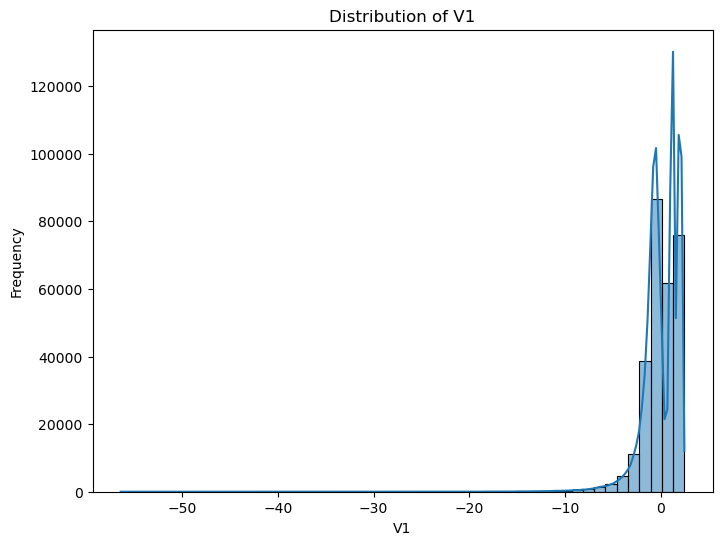

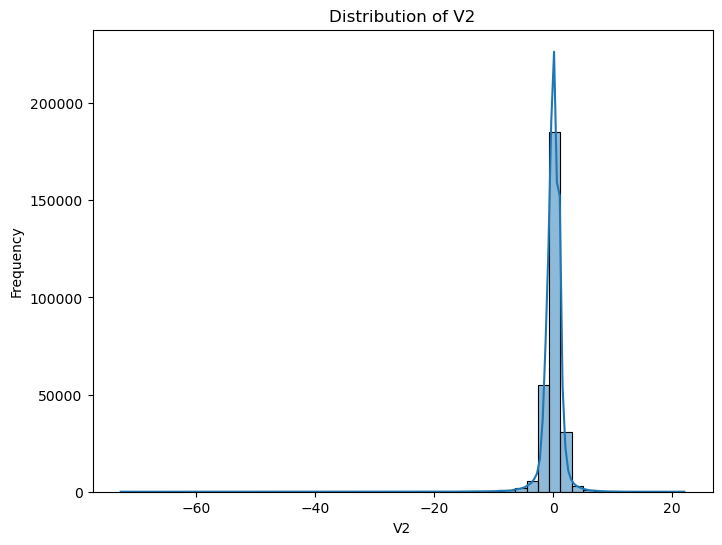

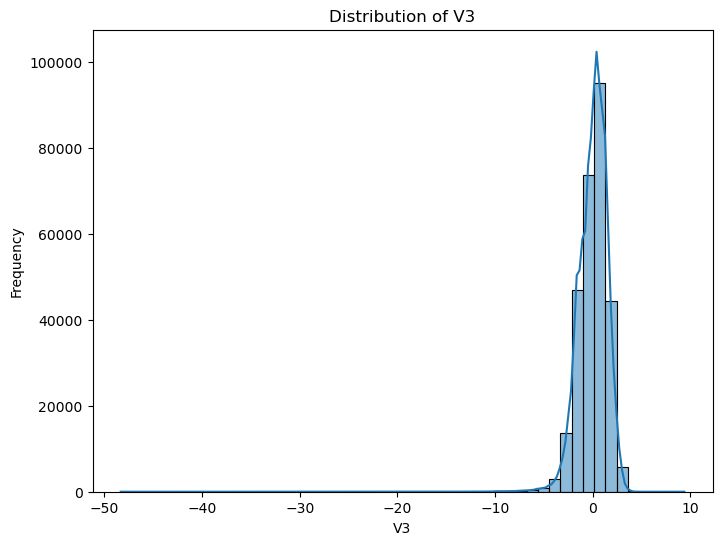

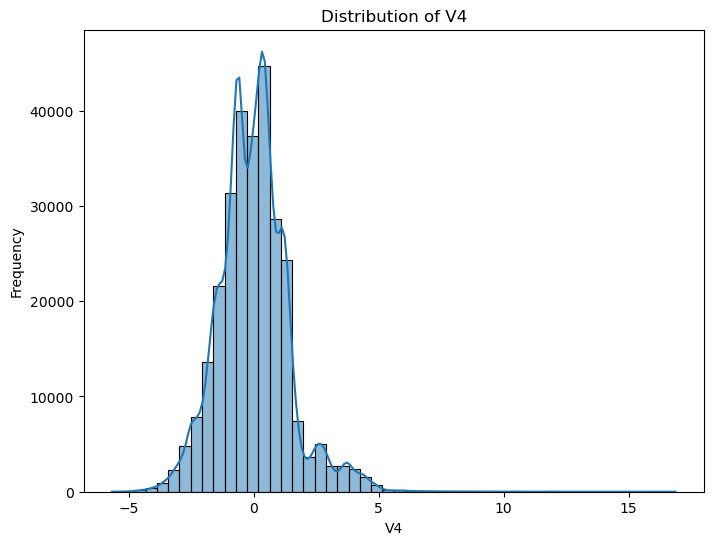

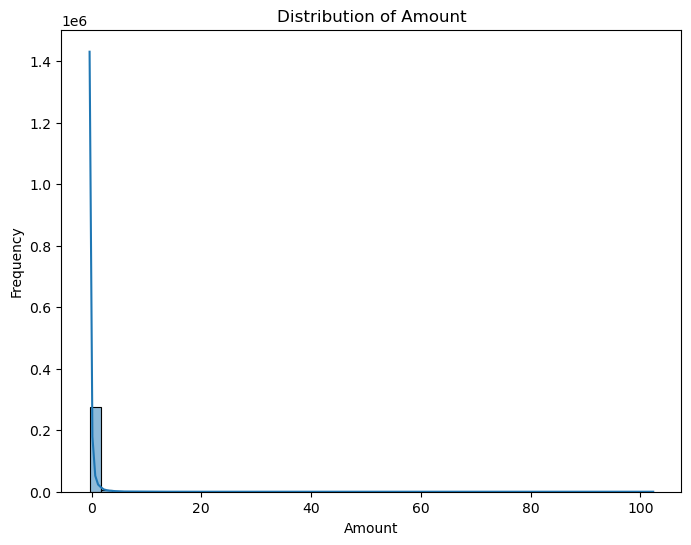

In [24]:
# Plot distributions of selected features
selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(credit_card_df[feature], bins=50, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

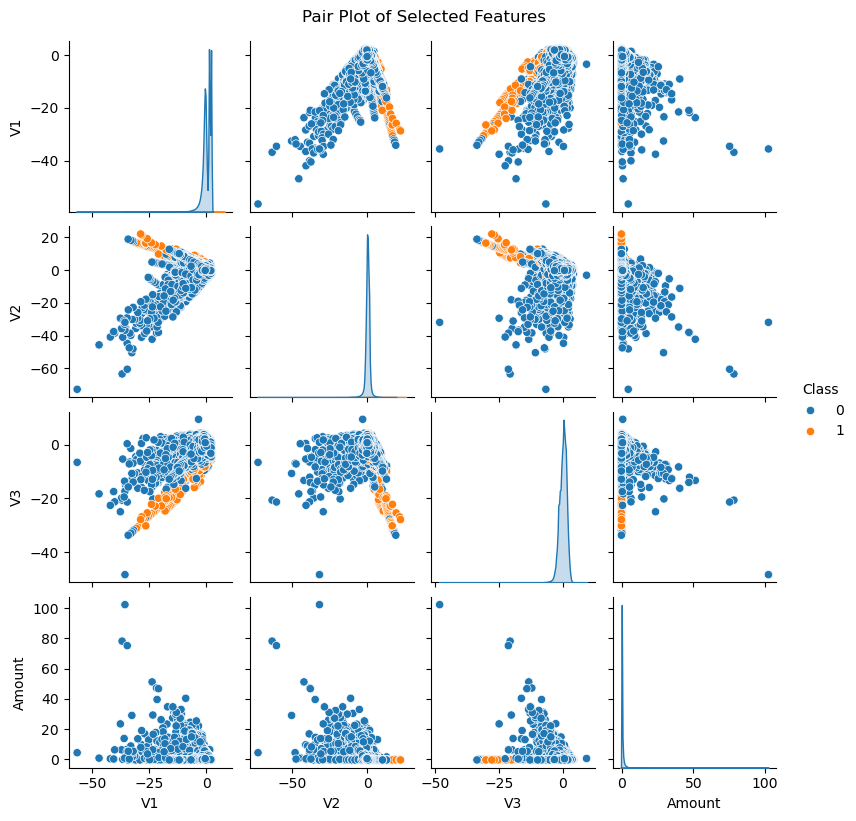

In [26]:
# Pair plot of selected features
selected_features = ['V1', 'V2', 'V3', 'Amount', 'Class']
sns.pairplot(credit_card_df[selected_features], hue='Class', diag_kind="kde", height=2)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

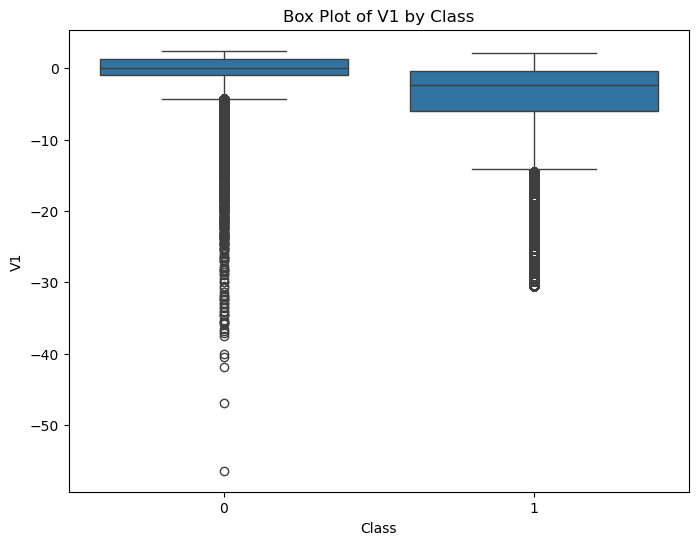

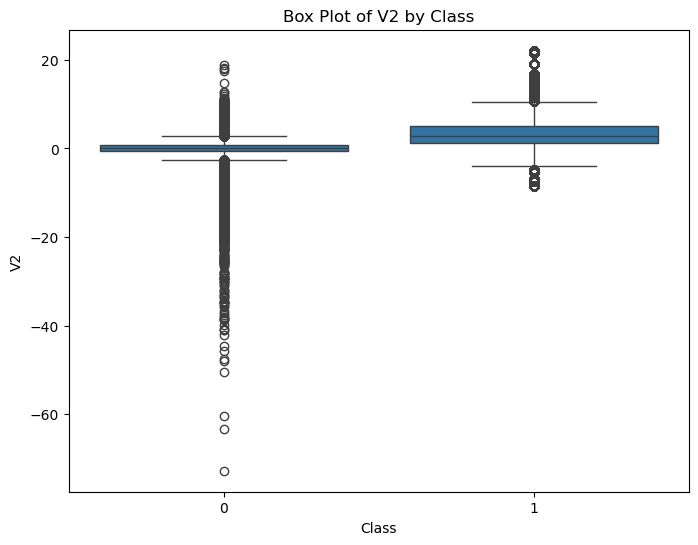

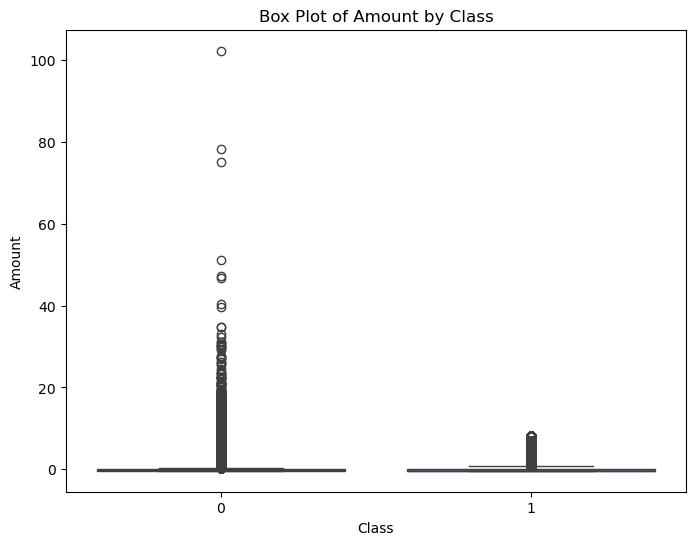

In [28]:
# Box plot for selected features grouped by 'Class'
selected_features = ['V1', 'V2', 'Amount']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=feature, data=balanced_data)
    plt.title(f"Box Plot of {feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)
    plt.show()

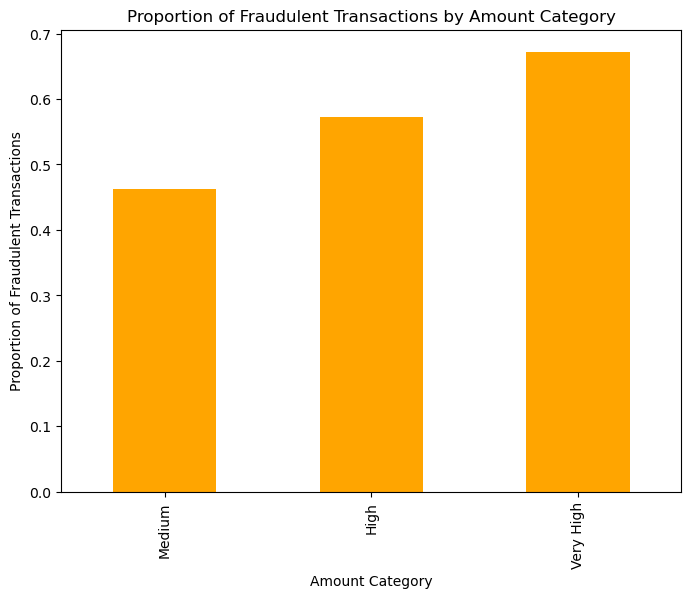

In [30]:
# Categorize transaction amounts (adjust the bins as per your data range)
balanced_data['Amount_Category'] = pd.cut(
    balanced_data['Amount'], bins=[-3, -1, 0, 1, 3], labels=["Low", "Medium", "High", "Very High"]
)

# Proportion of fraud in each category
fraud_proportion = balanced_data.groupby('Amount_Category', observed=True)['Class'].mean()

# Bar plot of fraudulent proportions
fraud_proportion.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title("Proportion of Fraudulent Transactions by Amount Category")
plt.xlabel("Amount Category")
plt.ylabel("Proportion of Fraudulent Transactions")
plt.show();

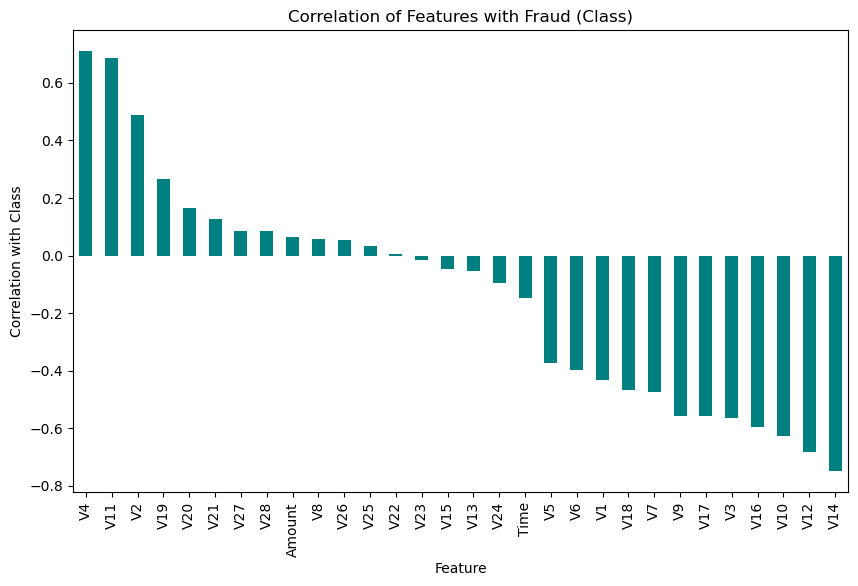

In [32]:
# Drop non-numeric columns to compute correlation
numeric_data = balanced_data.select_dtypes(include=[np.number])

# Correlation of features with the target variable
correlation_with_target = numeric_data.corr()['Class'].sort_values(ascending=False)

# Bar plot of correlations
plt.figure(figsize=(10, 6))
correlation_with_target.drop('Class').plot(kind='bar', color='teal')
plt.title("Correlation of Features with Fraud (Class)")
plt.xlabel("Feature")
plt.ylabel("Correlation with Class")
plt.show()

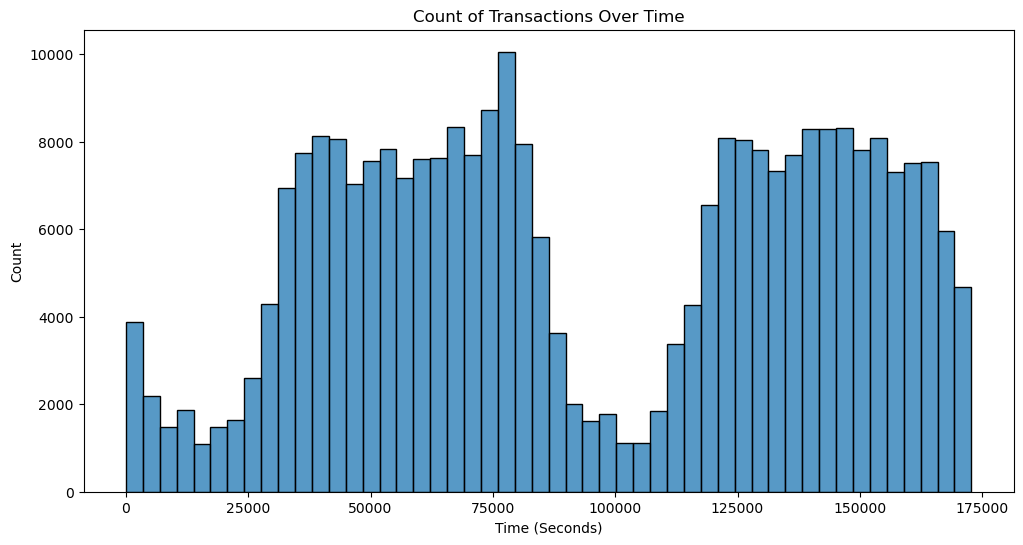

In [34]:
# Transactions count by time
plt.figure(figsize=(12, 6))
sns.histplot(credit_card_df['Time'], bins=50, kde=False)
plt.title("Count of Transactions Over Time")
plt.xlabel("Time (Seconds)")
plt.ylabel("Count")
plt.show();

## 4. Modeling on the Data

In [37]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predict on test data
y_pred = logistic_model.predict(X_test)
print("Logistic Regression Model Performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]))

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85591
           1       0.98      0.92      0.95     84998

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

ROC AUC: 0.9869871100284002


## 5. Comparison with other models

Logistic Regression Model Performance:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85591
           1       0.98      0.92      0.95     84998

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

Logistic Regression ROC AUC: 0.9869871100284002
Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85591
           1       1.00      1.00      1.00     84998

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

Random Forest ROC AUC: 1.0
Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85591
           1       1.00      1.00      1.00     84998

  

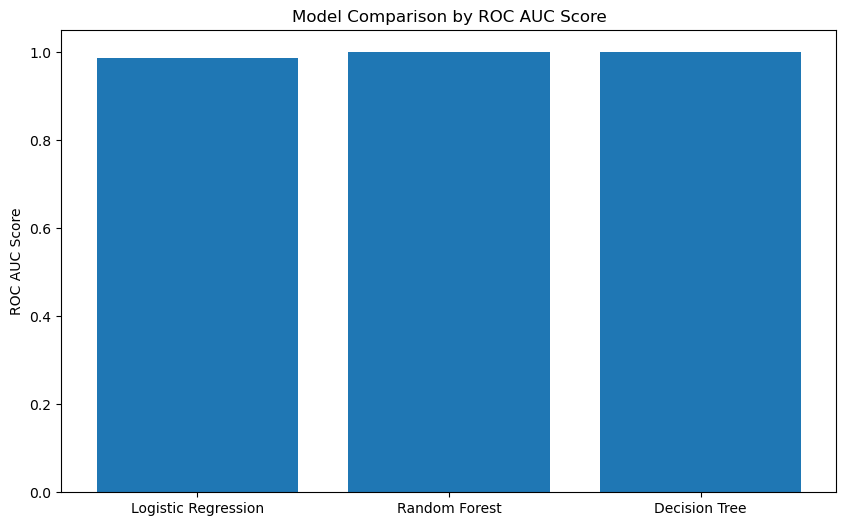

In [44]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
model_performance = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    model_performance[model_name] = roc_auc
    print(f"{model_name} Model Performance:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} ROC AUC: {roc_auc}")

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(model_performance.keys(), model_performance.values())
plt.title("Model Comparison by ROC AUC Score")
plt.ylabel("ROC AUC Score")
plt.show();

## 6. Hyperparameter Tuning and Cross-Validation

In [46]:
print(len(X_train))
print(len(y_train))

398041
398041


In [47]:
# Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring="roc_auc", verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
y_pred = best_rf_model.predict(X_test)
print("Best Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1]))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  43.8s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  43.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  43.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time= 1.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=16.4min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 2.1min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 2.1min
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time= 2.2min
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  43.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=  43.6s
[CV] END max_depth=10, min_samples_split=5, n_es

## 7. Evaluating a Classification Model (Beyond Accuracy)

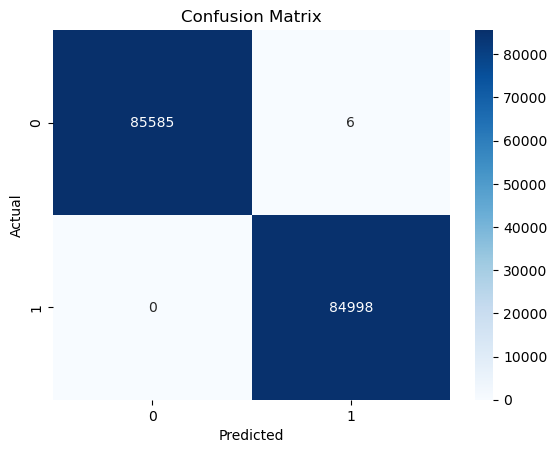

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 8. Feature Importance

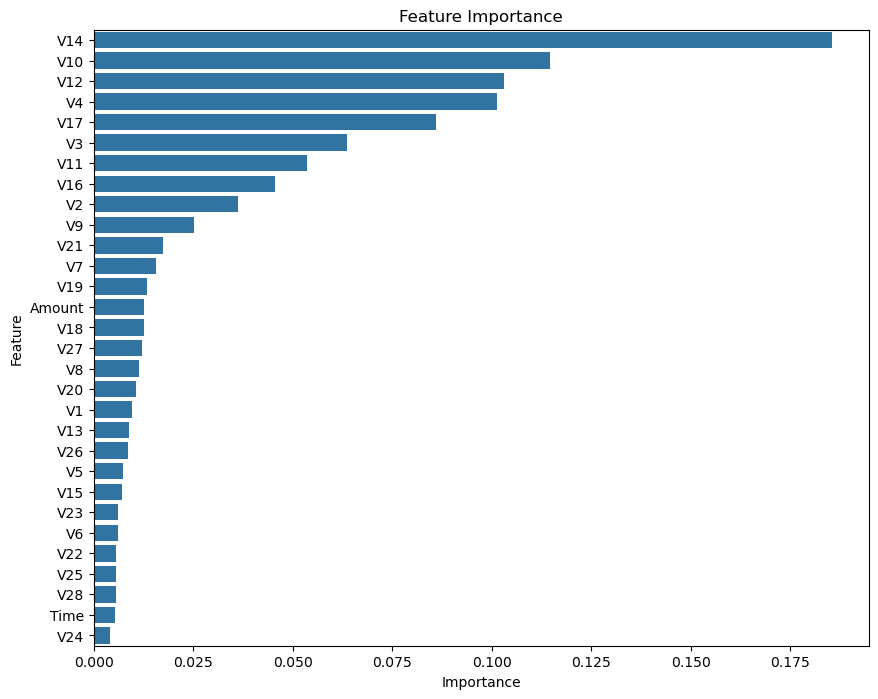

In [57]:
# Feature importance for the best Random Forest model
feature_importance = best_rf_model.feature_importances_
important_features = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=important_features)
plt.title("Feature Importance")
plt.show()